In [6]:
from seg_utils.hybrid import Hybrid
from seg_utils.data_preprocess import create_config
import numpy as np
import torch
from seg_utils.plotting import show_each_organ

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config, A_t, D_t, U_t = create_config(device)
segmentation_model = Hybrid(config, D_t, U_t, A_t).to(device)
segmentation_model.load_state_dict(torch.load("../models/HybridGNet/best.pt"))
segmentation_model.eval()
print('Model loaded')

Model loaded


In [3]:
from PIL import Image
from torchvision import transforms

# Define torchvision transform
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),          # Ensure grayscale 1 channel
    transforms.Resize((1024, 1024)),                       # Resize to 1024x1024
    transforms.ToTensor(),                                 # Converts to (C, H, W) and scales to [0,1]
])

img_path = "../sample/JPCLN001.png"
# Open image using PIL
image = Image.open(img_path).convert('L')  # 'L' mode ensures grayscale

# Apply transform and move to device → shape: (1, 1024, 1024)
tensor_image = transform(image).unsqueeze(0).to(device)    # → shape: (1, 1, 1024, 1024)

In [4]:
with torch.no_grad():
    output = segmentation_model(tensor_image)
output = output.cpu().numpy().reshape(-1) 
output = np.clip(output, 0, 1)[:240]

/root/dev/PulmoScanX/.venv/lib/python3.13/site-packages/torch/nn/modules/instancenorm.py:115: UserWarning: input's size at dim=1 does not match num_features. You can silence this warning by not passing in num_features, which is not used because affine=False
  warnings.warn(


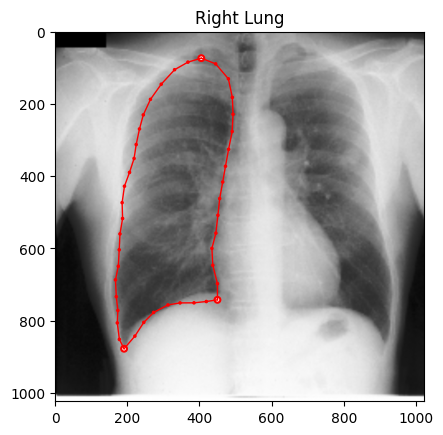

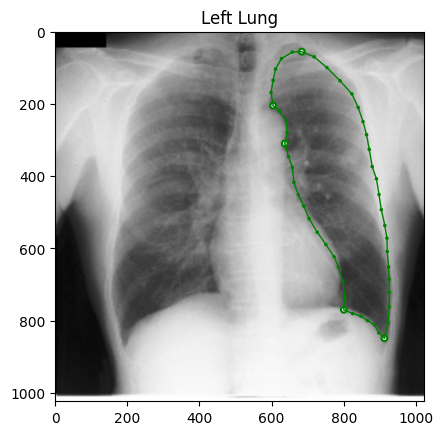

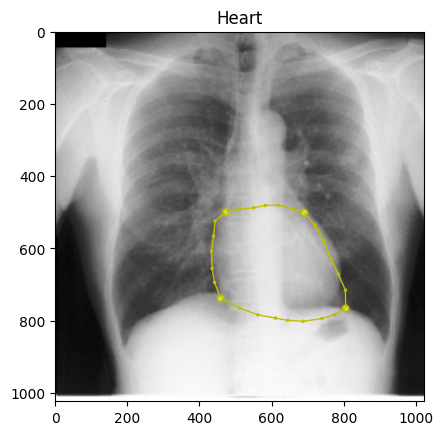

In [7]:
draw = tensor_image.cpu().numpy()[0,0,:,:]
show_each_organ(output, draw.copy())